In [2]:
import sklearn.datasets
from scipy.sparse.linalg import svds 
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import ortho_group
from scipy.linalg import subspace_angles
import matplotlib as mpl  
import PCA

from sklearn.metrics import mean_squared_error
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 17
plt.rcParams['xtick.labelsize'] = 19  
plt.rcParams['ytick.labelsize'] = 19 

from experience_pca_functions import *
from experience_plotting_function import *

In [3]:
vect1=[[1,0.9,0.9,1,0.9,0.7,0.1,0.2]]
vect2=[[1,1,1,1,1,1,1,1]]

print(distance_angle_vector(vect1,vect2))

def mse_projected_real_data(X,X_projected):
    return np.mean((X-X_projected))**2

[0.4418430283031523]


# Création de données à partir de deux composantes principales

In [4]:
eigen_values = np.array([5,1])
eigen_vectors = ortho_group.rvs(dim=2)
X = generate_data(1000, eigen_values, eigen_vectors)
X/=4

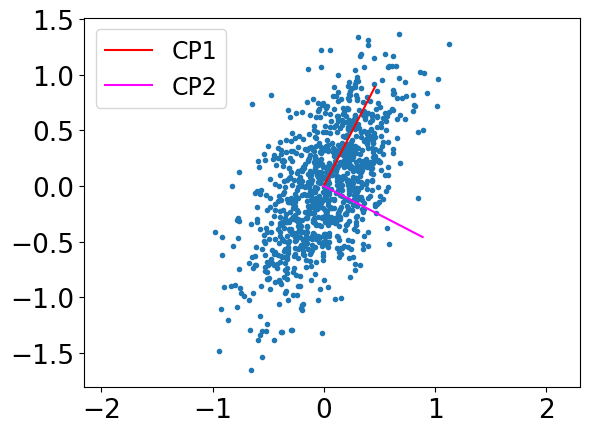

[35.38557265]
valeurs propres : [5 1]
vecteurs propres : [[ 0.45876143  0.88855948]
 [ 0.88855948 -0.45876143]]


In [5]:
plt.plot(X[0],X[1],'.')
plt.plot([0,eigen_vectors[0,0]],[0,eigen_vectors[1,0]],'r',label='CP1')
plt.plot([0,eigen_vectors[0,1]],[0,eigen_vectors[1,1]],'magenta',label='CP2')
plt.legend()
plt.axis('equal')
plt.savefig('images/principal_components_data.png')
plt.show()
print(np.rad2deg(distance_angle_vector(np.array([eigen_vectors[1]]),np.array([eigen_vectors[0]]))))

print('valeurs propres :',eigen_values)
print('vecteurs propres :',eigen_vectors)


## Projection sur la première composante principale

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


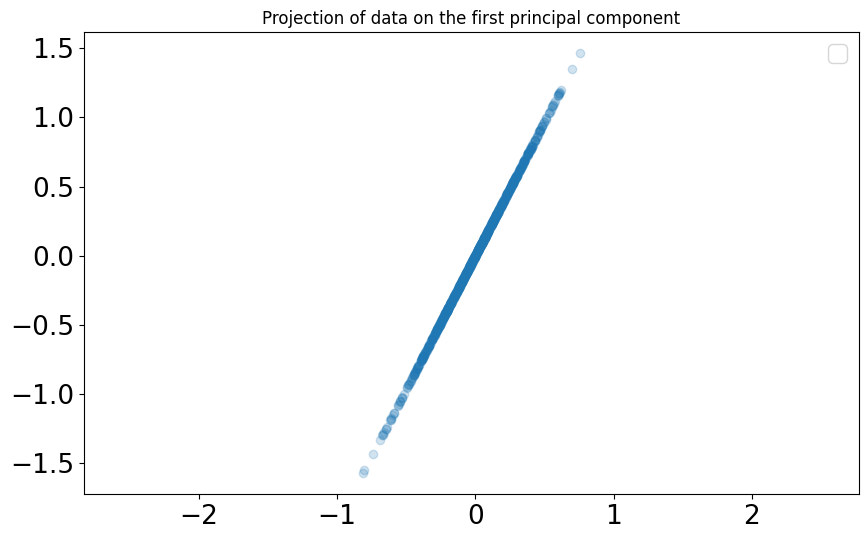

In [6]:
X_projected = np.dot(eigen_vectors[0].T, X)
X_reconstructed = np.dot(X_projected[:, np.newaxis], eigen_vectors[0].reshape(1, -1))
plt.figure(figsize=(10, 6))
plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1], alpha=0.2)


plt.legend()
plt.title("Projection of data on the first principal component")
plt.axis('equal')
plt.savefig('images/first_components_data_projected.png')
plt.show()



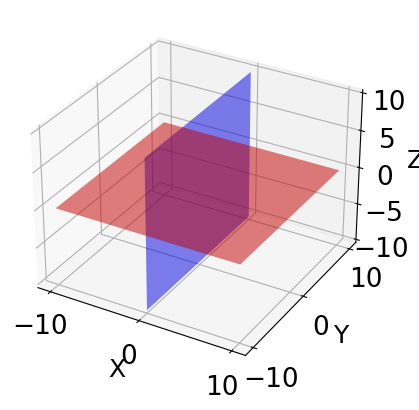

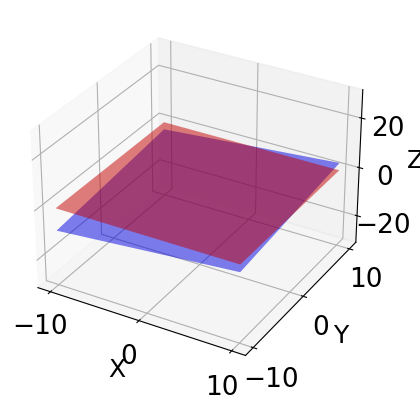

In [7]:
affichage_plan_orthogonal()
affichage_plan_proche()

# Experience selon nombre d'exemples

[0.6        0.4        0.4        0.17777778 0.11851852 0.07901235
 0.0526749  0.0351166  0.02341107 0.01560738]


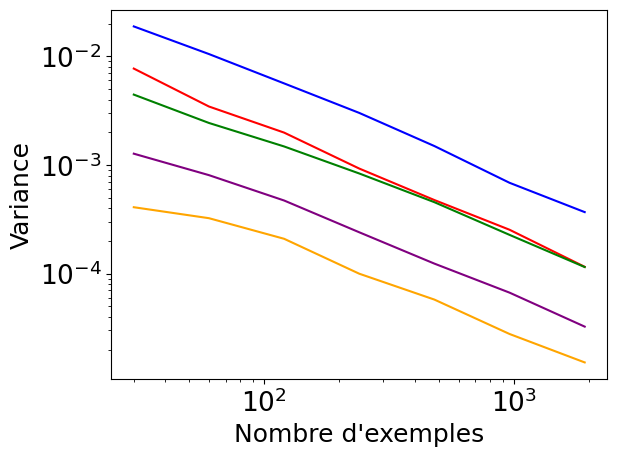

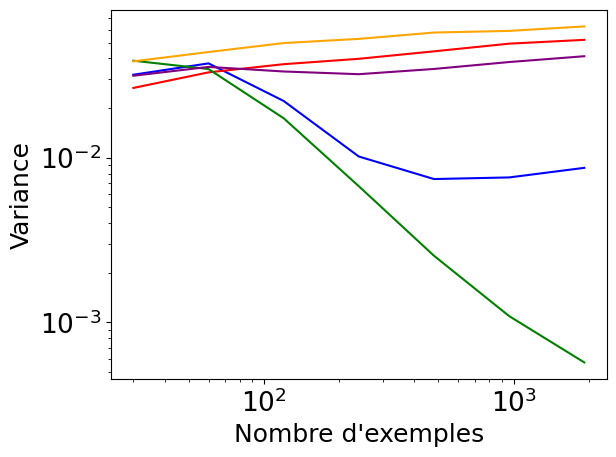

10
20
40
80
160
320
640
1280
2560
5120


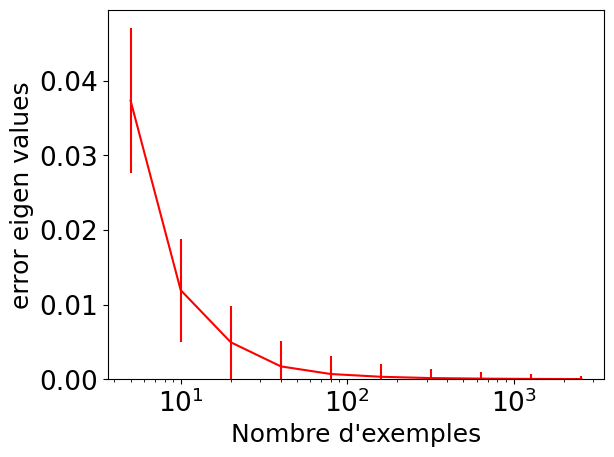

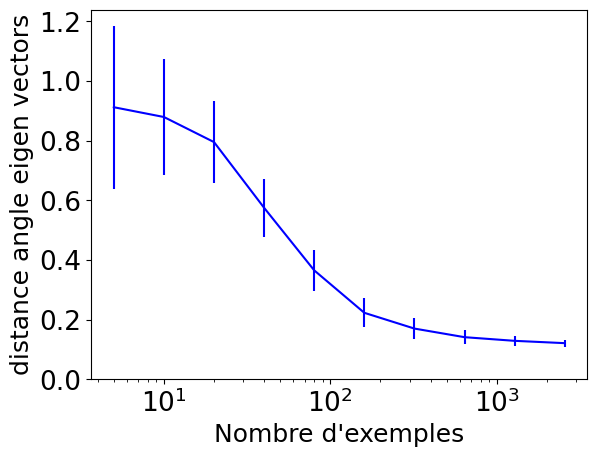

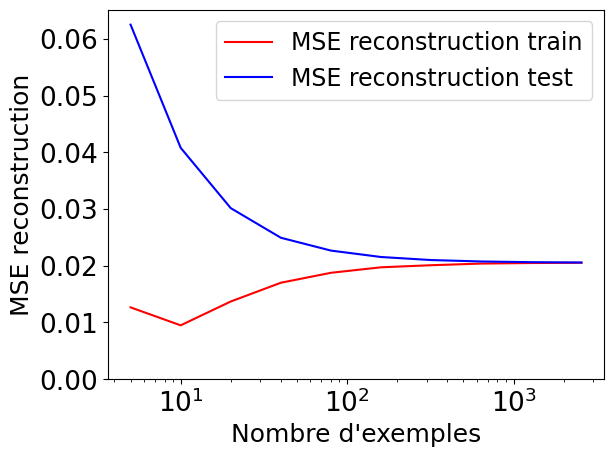

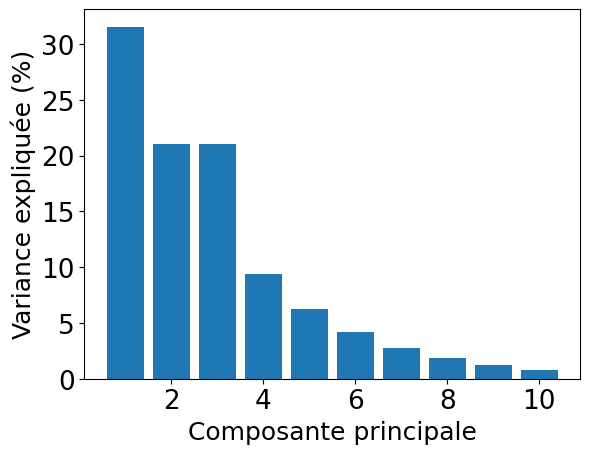

/home/victor/Documents/stage/stage/algorithme représentation/experience_plotting_function.py:92: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0)


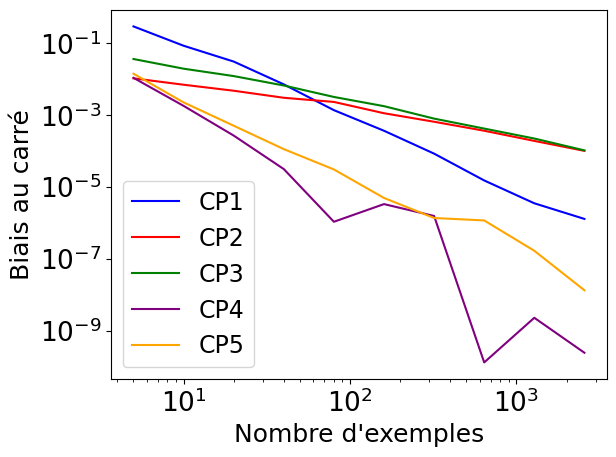

/home/victor/Documents/stage/stage/algorithme représentation/experience_plotting_function.py:116: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0)


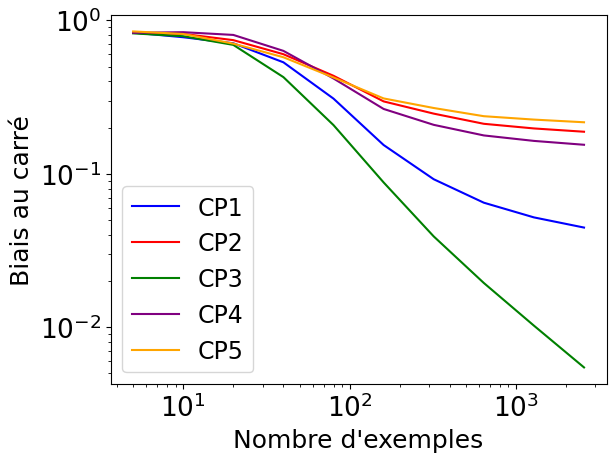

In [8]:
df = pd.DataFrame(columns=['eigen values mean', 'eigen vectors mean', 'eigenvalues error',
                           'eigenvectors error', 'error by eigenvalue', 'error by eigenvector',
                           'mse reconstruction train', 'mse reconstruction test',
                           'nb pc kept', 'number of examples', 'explained variance'])

eigen_values, eigen_vectors = generate_eigen_vectors_values(10,10)
eigen_values[2]=eigen_values[1] # pour avoir la même variance pour la deuxième et troisième composante principale
variance_biais_vectors_values(eigen_values.shape[0], 3000, eigen_values, eigen_vectors)

df = fill_df_examples(df, eigen_values.shape[0], 3000, eigen_values, eigen_vectors)
#plot_by_eigen_vector_biais2(df)
generate_plots(df, eigen_values, eigen_vectors)

# Experience selon la dimension : 

/home/victor/Documents/stage/stage/algorithme représentation/experience_plotting_function.py:270: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='dimension', y='mse reconstruction train',color="b", data=df, ci='sd')


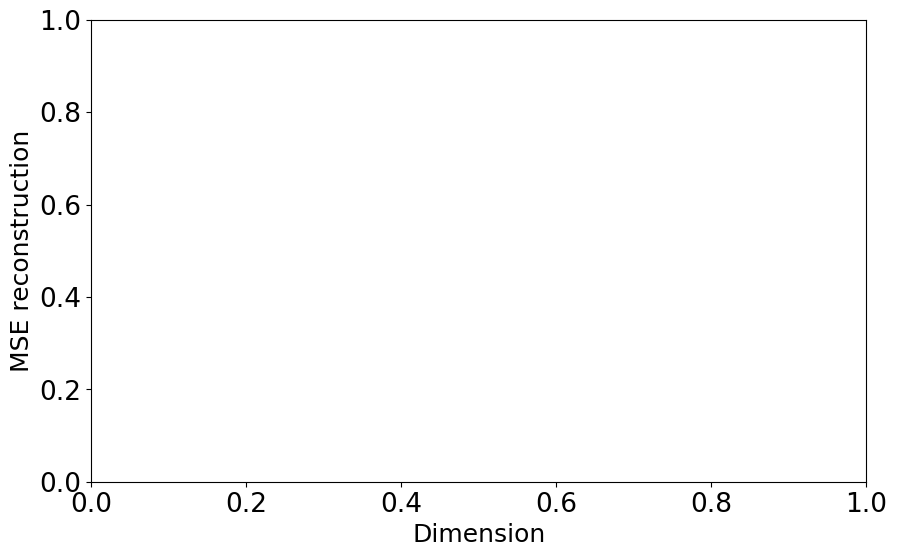

In [9]:
df = pd.DataFrame(columns=['mse reconstruction train','mse reconstruction test', 'dimension'])
df = fill_df_dimension(df, 161, 1000)
mse_dimension(df)
del df

# Temps d'execution PCA en fonction de la dimension

In [10]:
import time

def temps():
    temps_exécution = []
    dimension=2
    dimension_tab=[]
    indice=1
    temps=0
    while temps<70 and indice<13:
        start_time = time.time()
        pca = PCA.PCA()
        eigen_values, eigen_vectors = generate_eigen_vectors_values_2(dimension, dimension)
        X = generate_data(1000, eigen_values, eigen_vectors)
        pca.fit(X)
        end_time = time.time()
        temps= end_time - start_time
        temps_exécution.append(end_time - start_time)
        dimension_tab.append(dimension)
        dimension *= 2
        indice+=1
    plt.plot(dimension_tab,temps_exécution)
    plt.xlabel('dimension')
    plt.ylabel('temps d\'exécution')
    plt.savefig('images/temps_dimension.png',bbox_inches='tight')
    plt.show()


#temps()
        
